# INITIAL EXPLORATION OF THE DATASET

In [119]:
# importing libraries
import pandas as pd  # data science essentials
import matplotlib.pyplot as plt # essential graphical output
import seaborn as sns # enhanced graphical output
import numpy as np # mathematical essentials
import statsmodels.formula.api as smf # regression modeling
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import Lasso
from sklearn.linear_model import ARDRegression

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying file name
file = './birthweight_low.xlsx'


# reading the file into Python
birth_low = pd.read_excel(io= file, 
                        header = 0,
                        sheet_name =0)
# checking the file
birth_low.head (n =100)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
0,69,NaN,5,2.0,62,NaN,4,7,23,9,1,0,1,0,0,1,0,697
1,68,12.0,3,10.0,61,11.0,4,6,25,11,1,1,0,0,1,0,0,1290
2,71,12.0,3,6.0,46,12.0,2,7,21,12,1,0,1,0,0,1,0,1490
3,59,16.0,1,8.0,48,16.0,7,8,21,10,0,0,0,1,0,0,1,1720
4,48,12.0,4,6.0,39,12.0,2,9,17,13,0,1,0,0,1,0,0,1956
5,67,11.0,4,8.0,40,8.0,4,9,16,14,0,1,0,0,1,0,0,1984
6,54,12.0,2,12.0,46,12.0,9,9,17,12,1,0,1,0,0,1,0,2050
7,71,14.0,4,7.0,51,11.0,9,8,15,13,0,1,0,0,1,0,0,2068
8,56,12.0,1,9.0,53,14.0,8,9,14,9,1,1,0,0,1,0,0,2148
9,58,12.0,2,12.0,61,16.0,9,9,13,6,0,0,1,0,0,1,0,2180


In [78]:
# checking data type
birth_low.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mage    196 non-null    int64  
 1   meduc   193 non-null    float64
 2   monpre  196 non-null    int64  
 3   npvis   193 non-null    float64
 4   fage    196 non-null    int64  
 5   feduc   189 non-null    float64
 6   omaps   196 non-null    int64  
 7   fmaps   196 non-null    int64  
 8   cigs    196 non-null    int64  
 9   drink   196 non-null    int64  
 10  male    196 non-null    int64  
 11  mwhte   196 non-null    int64  
 12  mblck   196 non-null    int64  
 13  moth    196 non-null    int64  
 14  fwhte   196 non-null    int64  
 15  fblck   196 non-null    int64  
 16  foth    196 non-null    int64  
 17  bwght   196 non-null    int64  
dtypes: float64(3), int64(15)
memory usage: 27.7 KB


In [79]:
#checking if a value is missing
birth_low.isnull().sum(axis=0)

mage      0
meduc     3
monpre    0
npvis     3
fage      0
feduc     7
omaps     0
fmaps     0
cigs      0
drink     0
male      0
mwhte     0
mblck     0
moth      0
fwhte     0
fblck     0
foth      0
bwght     0
dtype: int64

In [80]:
# looping to detect features with missing values
for col in birth_low:

    # creating columns with 1s if missing and 0 if not
    if birth_low[col].isnull().astype(int).sum() > 0:
        birth_low['m_'+col] = birth_low[col].isnull().astype(int)


# summing the missing value flags to check the results of the loop above
birth_low[    ['m_meduc', 'm_npvis',
             'm_feduc']    ].sum(axis = 0)

m_meduc    3
m_npvis    3
m_feduc    7
dtype: int64

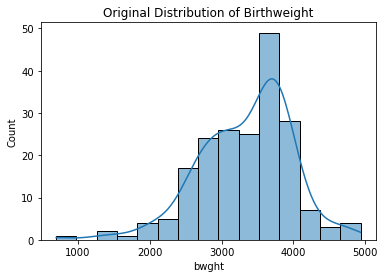

In [81]:
# developing a histogram using histplot
sns.histplot(data   = birth_low,
          x      = "bwght",
          kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of Birthweight")
plt.xlabel(xlabel = "bwght") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

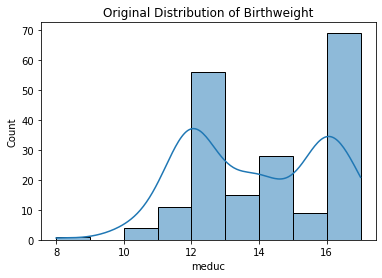

In [82]:
# developing a histogram using histplot
sns.histplot(data   = birth_low,
          x      = "meduc",
          kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of Birthweight")
plt.xlabel(xlabel = "meduc") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

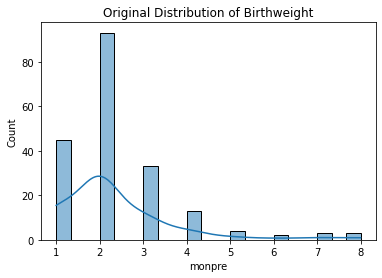

In [83]:
# developing a histogram using histplot
sns.histplot(data   = birth_low,
          x      = "monpre",
          kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of Birthweight")
plt.xlabel(xlabel = "monpre") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

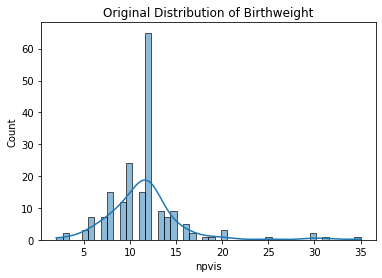

In [84]:
# developing a histogram using histplot
sns.histplot(data   = birth_low,
          x      = "npvis",
          kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of Birthweight")
plt.xlabel(xlabel = "npvis") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

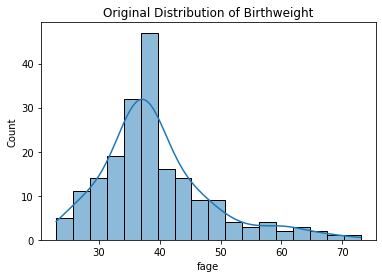

In [85]:
# developing a histogram using histplot
sns.histplot(data   = birth_low,
          x      = "fage",
          kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of Birthweight")
plt.xlabel(xlabel = "fage") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

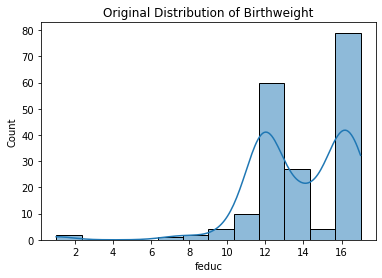

In [86]:
# developing a histogram using histplot
sns.histplot(data   = birth_low,
          x      = "feduc",
          kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of Birthweight")
plt.xlabel(xlabel = "feduc") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

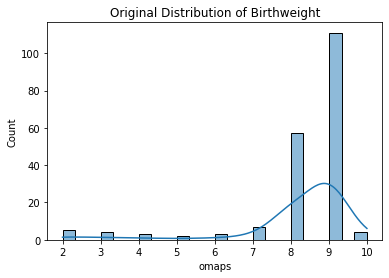

In [87]:
# developing a histogram using histplot
sns.histplot(data   = birth_low,
          x      = "omaps",
          kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of Birthweight")
plt.xlabel(xlabel = "omaps") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

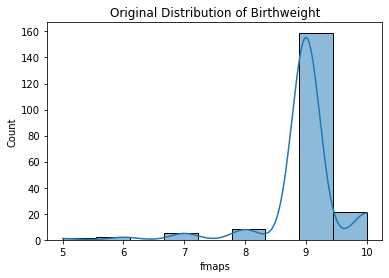

In [88]:
# developing a histogram using histplot
sns.histplot(data   = birth_low,
          x      = "fmaps",
          kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of Birthweight")
plt.xlabel(xlabel = "fmaps") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

In [89]:
# imputing everything else with the zero

fill = 0
birth_low['meduc'] = birth_low['meduc'].fillna(value = fill)


fill = 0
birth_low['npvis'] = birth_low['npvis'].fillna(value = fill)


fill = 0
birth_low['feduc'] = birth_low['feduc'].fillna(value = fill)


In [90]:
# counting the number of zeroes for 
meduc_zeroes = len(birth_low['meduc'][birth_low['meduc']==0]) 
npvis_zeroes = len(birth_low['npvis'][birth_low['npvis']==0]) 
feduc_zeroes = len(birth_low['feduc'][birth_low['feduc']==0]) 

## the table below has been coded for you ##

# printing a table of the results
print(f"""
                 No\t\tYes
               ---------------------
meduc          | {meduc_zeroes}\t\t{len(birth_low) - meduc_zeroes}
npvis          | {npvis_zeroes}\t\t{len(birth_low) - npvis_zeroes}
feduc          | {feduc_zeroes}\t\t{len(birth_low) - feduc_zeroes}
""")


                 No		Yes
               ---------------------
meduc          | 3		193
npvis          | 3		193
feduc          | 7		189



In [118]:
# checking if a value is missing
birth_low.isnull().any().any()

False

In [92]:
# placeholder variables
birth_low['has_meduc']     = 0
birth_low['has_npvis']     = 0
birth_low['has_feduc']     = 0


for index, value in birth_low.iterrows():
    

    # meduc
    if birth_low.loc[index, 'meduc'] > 0:
        birth_low.loc[index, 'has_meduc'] = 1
        
        
    # npvis
    if birth_low.loc[index, 'npvis'] > 0:
        birth_low.loc[index, 'has_npvis'] = 1
        
        
    # feduc
    if birth_low.loc[index, 'feduc'] > 0:
        birth_low.loc[index, 'has_feduc'] = 1


In [93]:
# checking the variable has_meduc, has_npvis, has_feduc
birth_low[  ['has_meduc', 'has_npvis', 'has_feduc']  ].head(n = 5)

,has_meduc,has_npvis,has_feduc
0,0,1,0
1,1,1,1
2,1,1,1
3,1,1,1
4,1,1,1


In [94]:
# developing a small correlation matrix
zeroes_corr = birth_low.corr()    # .round(decimals = 2)


# checking the correlations of the newly-created variables
zeroes_corr.loc['bwght',                   # Y-variable
               ['has_meduc', 'has_npvis', 'has_feduc']] \
                .sort_values(ascending = False)

has_meduc    0.133703
has_feduc    0.003563
has_npvis   -0.063637
Name: bwght, dtype: float64

In [95]:
# log transforming bwght and saving it to the dataset
birth_low['log_bwght'] = np.log(birth_low['bwght'])

# log transforming monpre and saving it to the dataset
birth_low['log_monpre'] = np.log(birth_low['monpre'])

# log transforming omaps and saving it to the dataset
birth_low['log_omaps'] = np.log(birth_low['omaps'])

# log transforming fmaps and saving it to the dataset
birth_low['log_fmaps'] = np.log(birth_low['fmaps'])

# log transforming fage and saving it to the dataset
birth_low['log_fage'] = np.log(birth_low['fage'])

In [96]:
# checking the variable log_fage, log_fmaps, log_omaps, log_monpre,log_bwght'
birth_low[  ['log_fage', 'log_fmaps', 'log_omaps', 'log_monpre','log_bwght']  ].head(n = 5)

,log_fage,log_fmaps,log_omaps,log_monpre,log_bwght
0,4.127134,1.945910,1.386294,1.609438,6.546785
1,4.110874,1.791759,1.386294,1.098612,7.162397
2,3.828641,1.945910,0.693147,1.098612,7.306531
3,3.871201,2.079442,1.945910,0.000000,7.450080
4,3.663562,2.197225,0.693147,1.386294,7.578657


In [97]:
# placeholder variables
birth_low['m_light_drink'] = 0
birth_low['m_regular_drink'] = 0
birth_low['m_heavy_drink'] = 0

for index, row in birth_low.iterrows():
    
    # m_light_drink
    if birth_low.loc[index, 'drink'] < 4:
        birth_low.loc[index, 'm_light_drink'] = 1    
        
    # m_regular_drink
    elif birth_low.loc[index, 'drink'] >= 5 and birth_low.loc[index, 'drink'] < 8:
        birth_low.loc[index, 'm_regular_drink'] = 1
        
    # m_heavy_drink
    elif birth_low.loc[index, 'drink'] >= 8:
        birth_low.loc[index, 'm_heavy_drink'] = 1

In [98]:
# placeholder variables
birth_low['m_light_cigs'] = 0
birth_low['m_regular_cigs'] = 0
birth_low['m_heavy_cigs'] = 0

for index, row in birth_low.iterrows():
    
    # m_light_cigs
    if birth_low.loc[index, 'cigs'] < 6:
        birth_low.loc[index, 'm_light_cigs'] = 1    
        
    # m_regular_cigs
    elif birth_low.loc[index, 'cigs'] >= 11 and birth_low.loc[index, 'cigs'] < 16:
        birth_low.loc[index, 'm_regular_cigs'] = 1
        
    # m_heavy_cigs
    elif birth_low.loc[index, 'cigs'] >= 16:
        birth_low.loc[index, 'm_heavy_cigs'] = 1

In [99]:
# placeholder variables
birth_low['m_20_age'] = 0
birth_low['m_30_age'] = 0
birth_low['m_40_age'] = 0
birth_low['m_50_age'] = 0
birth_low['m_60_age'] = 0
birth_low['m_70_age'] = 0


for index, row in birth_low.iterrows():
    
    # m_20_age
    if birth_low.loc[index, 'mage'] >= 20 and birth_low.loc[index, 'mage'] < 30:
        birth_low.loc[index, 'm_20_age'] = 1
        
    # m_30_age
    elif birth_low.loc[index, 'mage'] >= 30 and birth_low.loc[index, 'mage'] < 40:
        birth_low.loc[index, 'm_30_age'] = 1
      
    # m_40_age
    elif birth_low.loc[index, 'mage'] >= 40 and birth_low.loc[index, 'mage'] < 50:
        birth_low.loc[index, 'm_40_age'] = 1
        
    # m_50_age    
    elif birth_low.loc[index, 'mage'] >= 50 and birth_low.loc[index, 'mage'] < 60:
        birth_low.loc[index, 'm_50_age'] = 1     
        
    # m_60_age
    elif birth_low.loc[index, 'mage'] >=60 and birth_low.loc[index, 'mage'] < 70:
        birth_low.loc[index, 'm_60_age'] = 1
     
    # m_70_age
    elif birth_low.loc[index, 'mage'] >= 70:
        birth_low.loc[index, 'm_70_age'] = 1

In [100]:
# placeholder variables
birth_low['m_low_omaps'] = 0
birth_low['m_regular_omaps'] = 0
birth_low['m_high_omaps'] = 0
birth_low['m_too_high_omaps'] = 0

for index, row in birth_low.iterrows():
    
    # m_low_omaps
    if birth_low.loc[index, 'omaps'] < 8:
        birth_low.loc[index, 'm_low_omaps'] = 1    
    
    # m_regular_omaps
    elif birth_low.loc[index, 'omaps'] >= 8 and birth_low.loc[index, 'omaps'] < 9:
        birth_low.loc[index, 'm_regular_omaps'] = 1
    
    # m_high_omaps
    elif birth_low.loc[index, 'omaps'] >= 9 and birth_low.loc[index, 'omaps'] < 10:
        birth_low.loc[index, 'm_high_omaps'] = 1    
    
    # m_too_high_omaps
    elif birth_low.loc[index, 'omaps'] >= 10:
        birth_low.loc[index, 'm_too_high_omaps'] = 1

In [101]:
# placeholder variables
birth_low['m_low_fmaps'] = 0
birth_low['m_regular_fmaps'] = 0
birth_low['m_high_fmaps'] = 0

for index, row in birth_low.iterrows():
    
    # m_low_fmaps
    if birth_low.loc[index, 'fmaps'] < 9:
        birth_low.loc[index, 'm_low_fmaps'] = 1    
        
    #m_regular_fmaps
    elif birth_low.loc[index, 'fmaps'] >= 9 and birth_low.loc[index, 'fmaps'] < 10:
        birth_low.loc[index, 'm_regular_fmaps'] = 1
        
    #m_high_fmaps    
    elif birth_low.loc[index, 'fmaps'] >= 10:
        birth_low.loc[index, 'm_high_fmaps'] = 1

In [102]:
# multipling drink and cigs and saving it to the dataset
birth_low['drink_cigs']=birth_low['drink']*birth_low['cigs']

# multipling drink and mage and saving it to the dataset
birth_low['drink_mage']=birth_low['drink']*birth_low['mage']

# multipling drink and fage and saving it to the dataset
birth_low['drink_fage']=birth_low['drink']*birth_low['fage']

# multipling cigs and mage and saving it to the dataset
birth_low['cigs_mage']=birth_low['cigs']*birth_low['mage']

# multipling fage and cigs and saving it to the dataset
birth_low['cigs_fage']=birth_low['cigs']*birth_low['fage']

# multipling fage and mage and saving it to the dataset
birth_low['fage_mage']=birth_low['fage']*birth_low['mage']

# multipling omaps and fmaps and saving it to the dataset
birth_low['omaps_fmaps']=birth_low['fmaps']*birth_low['omaps']

# multipling drink and drink and saving it to the dataset
birth_low['drink_drink']=birth_low['drink']*birth_low['drink']


In [103]:
# placeholder variables
birth_low['m_fageH_mageL'] = 0
birth_low['m_fageL_mageH'] = 0
birth_low['m_fageH_mageH'] = 0
birth_low['m_fageL_mageL'] = 0

for index, row in birth_low.iterrows():
    
    # m_fageH_mageL
    if birth_low.loc[index, 'fage'] >= 38 and birth_low.loc[index, 'fage'] < 39:
        birth_low.loc[index, 'm_fageH_mageL'] = 1    
    
    #m_fageL_mageH
    elif birth_low.loc[index, 'mage'] >= 39 and birth_low.loc[index, 'fage'] < 38:
        birth_low.loc[index, 'm_fageL_mageH'] = 1
    
    #m_fageH_mageH
    elif birth_low.loc[index, 'mage'] >= 39 and birth_low.loc[index, 'fage'] >= 38:
        birth_low.loc[index, 'm_fageH_mageH'] = 1    
    
    #m_fageL_mageL
    elif birth_low.loc[index, 'mage'] < 39 and birth_low.loc[index, 'fage'] < 38:
        birth_low.loc[index, 'm_fageL_mageL'] = 1  
        

In [104]:
# placeholder variables
birth_low['m_20_age_F'] = 0
birth_low['m_30_age_F'] = 0
birth_low['m_40_age_F'] = 0
birth_low['m_50_age_F'] = 0
birth_low['m_60_age_F'] = 0
birth_low['m_70_age_F'] = 0

for index, row in birth_low.iterrows():
    
    # m_20_age_F
    if birth_low.loc[index, 'fage'] >= 20 and birth_low.loc[index, 'fage'] < 30:
        birth_low.loc[index, 'm_20_age_F'] = 1    
    
    # m_30_age_F
    elif birth_low.loc[index, 'fage'] >= 30 and birth_low.loc[index, 'fage'] < 40:
        birth_low.loc[index, 'm_30_age_F'] = 1
    
    # m_40_age_F
    elif birth_low.loc[index, 'fage'] >= 40 and birth_low.loc[index, 'fage'] < 50:
        birth_low.loc[index, 'm_40_age_F'] = 1    
    
    # m_50_age_F
    elif birth_low.loc[index, 'fage'] >= 50 and birth_low.loc[index, 'fage'] < 60:
        birth_low.loc[index, 'm_50_age_F'] = 1  
    
    # m_60_age_F
    elif birth_low.loc[index, 'fage'] >= 60 and birth_low.loc[index, 'fage'] < 70:
        birth_low.loc[index, 'm_60_age_F'] = 1
    
    # m_70_age_F
    elif birth_low.loc[index, 'fage'] >= 70:
        birth_low.loc[index, 'm_70_age_F'] = 1

In [105]:
# placeholder variables
birth_low['m_drinking'] = 0
birth_low['m_not_drinking'] = 0

for index, row in birth_low.iterrows():
    
    # m_drinking
    if birth_low.loc[index, 'drink'] < 1 :
        birth_low.loc[index, 'm_not_drinking'] = 1   
     
    # m_not_drinking
    elif birth_low.loc[index, 'drink'] >= 1 :
        birth_low.loc[index, 'm_drinking'] = 1

# placeholder variables
birth_low['m_cigs'] = 0
birth_low['m_not_cigs'] = 0

for index, row in birth_low.iterrows():
    
    # m_cigs
    if birth_low.loc[index, 'cigs'] < 1 :
        birth_low.loc[index, 'm_not_cigs'] = 1  
        
     # m_not_cigs   
    elif birth_low.loc[index, 'cigs'] >= 1 :
        birth_low.loc[index, 'm_cigs'] = 1

In [106]:
# making a copy of birth_low
birth_low_explanatory = birth_low.copy()


# dropping bwght and log_bwght from the explanatory variable set
birth_low_explanatory =  birth_low_explanatory.drop(['bwght',
                                 'log_bwght'], axis = 1)


# formatting each explanatory variable for statsmodels
for val in birth_low_explanatory:
    print(f"'{val}',")

'mage',
'meduc',
'monpre',
'npvis',
'fage',
'feduc',
'omaps',
'fmaps',
'cigs',
'drink',
'male',
'mwhte',
'mblck',
'moth',
'fwhte',
'fblck',
'foth',
'm_meduc',
'm_npvis',
'm_feduc',
'has_meduc',
'has_npvis',
'has_feduc',
'log_monpre',
'log_omaps',
'log_fmaps',
'log_fage',
'm_light_drink',
'm_regular_drink',
'm_heavy_drink',
'm_light_cigs',
'm_regular_cigs',
'm_heavy_cigs',
'm_20_age',
'm_30_age',
'm_40_age',
'm_50_age',
'm_60_age',
'm_70_age',
'm_low_omaps',
'm_regular_omaps',
'm_high_omaps',
'm_too_high_omaps',
'm_low_fmaps',
'm_regular_fmaps',
'm_high_fmaps',
'drink_cigs',
'drink_mage',
'drink_fage',
'cigs_mage',
'cigs_fage',
'fage_mage',
'omaps_fmaps',
'drink_drink',
'm_fageH_mageL',
'm_fageL_mageH',
'm_fageH_mageH',
'm_fageL_mageL',
'm_20_age_F',
'm_30_age_F',
'm_40_age_F',
'm_50_age_F',
'm_60_age_F',
'm_70_age_F',
'm_drinking',
'm_not_drinking',
'm_cigs',
'm_not_cigs',


In [107]:
# creating a (Pearson) correlation matrix
data =  ['mage', 'meduc', 'monpre', 'npvis', 'fage','feduc','omaps', 'fmaps', \
        'cigs', 'drink', 'male', 'mwhte', 'mblck', 'moth', 'fwhte','fblck','foth',\
        'bwght','m_meduc','m_npvis','m_feduc', 'log_fage', 'log_fmaps', 'log_omaps', \
        'log_monpre','log_bwght','m_light_drink','m_regular_drink','m_heavy_drink',\
        'm_light_cigs','m_regular_cigs','m_heavy_cigs','m_20_age','m_30_age',\
        'm_40_age','m_50_age','m_60_age','m_70_age','m_low_omaps','m_regular_omaps',\
        'm_high_omaps','m_too_high_omaps','m_low_fmaps','m_regular_fmaps',\
        'm_high_fmaps','drink_cigs','drink_mage','drink_fage','cigs_mage','cigs_fage',\
        'fage_mage','omaps_fmaps','drink_drink','m_fageH_mageL','m_fageL_mageH',\
        'm_fageH_mageH','m_fageL_mageL','m_20_age_F','m_30_age_F','m_40_age_F',\
        'm_50_age_F','m_60_age_F','m_70_age_F','m_drinking','m_not_drinking',\
        'm_cigs','m_not_cigs']

# developing a correlation matrix based on continuous features
birth_low_corr = birth_low[data].corr(method = 'pearson')


# filtering the results to only show correlations with Sale_Price
birth_low_corr.loc[ : , 'bwght'].round(decimals = 2).sort_values(ascending = False)

bwght               1.00
log_bwght           0.97
m_light_drink       0.51
m_light_cigs        0.35
m_not_drinking      0.27
m_not_cigs          0.26
m_30_age_F          0.26
omaps_fmaps         0.26
log_omaps           0.26
log_fmaps           0.26
omaps               0.25
fmaps               0.25
m_30_age            0.22
m_regular_omaps     0.17
m_fageH_mageL       0.16
m_fageL_mageL       0.16
meduc               0.16
m_fageL_mageH       0.14
mblck               0.13
fblck               0.12
male                0.11
feduc               0.10
m_too_high_omaps    0.10
m_regular_fmaps     0.10
m_20_age            0.08
m_20_age_F          0.08
m_40_age            0.07
m_high_fmaps        0.06
m_npvis             0.06
npvis               0.04
m_regular_drink     0.01
m_feduc            -0.00
m_high_omaps       -0.01
moth               -0.02
m_70_age_F         -0.04
fwhte              -0.04
monpre             -0.05
log_monpre         -0.06
m_40_age_F         -0.07
foth               -0.08


#  PREPARE FOR MODEL DEVELOPMENT: Training and Testing Sets

In [108]:
# declaring set of x-variables
x_variables = ['drink', 'drink_cigs', 'm_regular_cigs',
               'm_regular_omaps', 'feduc', 'm_20_age',
               'm_fageH_mageL', 'fage_mage']


# looping to make x-variables suitable for statsmodels
for val in x_variables:
    print(f"{val} +")

drink +
drink_cigs +
m_regular_cigs +
m_regular_omaps +
feduc +
m_20_age +
m_fageH_mageL +
fage_mage +


In [109]:
# INSTANTIATING a model type
lm_price_qual = smf.ols(formula = """bwght ~drink + drink_cigs+m_regular_cigs+
                                    m_regular_omaps+feduc+m_20_age+m_fageH_mageL+
                                    fage_mage""",
                        data = birth_low)


# telling Python to FIT the data to the blueprint
results = lm_price_qual.fit()


# printing a summary of the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     68.78
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           1.21e-51
Time:                        20:02:28   Log-Likelihood:                -1411.7
No. Observations:                 196   AIC:                             2841.
Df Residuals:                     187   BIC:                             2871.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4127.7128    118.662     

In [110]:
# preparing explanatory variable data
birth_low_data   = birth_low.drop(['bwght','log_bwght','cigs', 'm_light_drink','m_light_cigs',\
                                   'log_fmaps','log_omaps','omaps','fmaps','m_30_age',\
                                   'm_npvis','meduc','has_meduc','mblck','fblck','male',\
                                   'm_regular_fmaps','m_too_high_omaps','m_40_age',\
                                   'm_high_fmaps','npvis','m_regular_drink',\
                                   'm_feduc','has_feduc','m_high_omaps','moth',\
                                   'fwhte','monpre','log_monpre', 'has_npvis',\
                                   'foth','mwhte','m_meduc','m_low_fmaps','m_50_age',\
                                   'm_70_age','m_low_omaps','m_60_age','log_fage',\
                                   'fage','mage','m_heavy_drink','cigs_fage',\
                                   'cigs_mage','drink_fage','drink_mage', 'm_heavy_cigs',\
                                   'm_20_age_F','m_30_age_F','m_40_age_F','m_50_age_F',\
                                   'm_60_age_F','m_70_age_F','m_fageL_mageL',\
                                   'm_fageL_mageH','m_fageH_mageH','m_drinking',\
                                   'm_not_drinking','m_cigs','m_not_cigs','omaps_fmaps','drink_drink'],
                                axis = 1)


# preparing response variable data
birth_low_target = birth_low.loc[ : , 'bwght']


# preparing training and testing sets (all letters are lowercase)
X_train, X_test, y_train, y_test = train_test_split(
            birth_low_data,
            birth_low_target,
            test_size = 0.25,
            random_state = 219)


# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {X_train.shape}
y-side: {y_train.shape[0]}


Testing Data
------------
X-side: {X_test.shape}
y-side: {y_test.shape[0]}
""")


Training Data
-------------
X-side: (147, 8)
y-side: 147


Testing Data
------------
X-side: (49, 8)
y-side: 49



# MODEL DEVELOPMENT : OLS, Lasso and ARD, and analyze results

In [111]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Create the regressor: reg_all
reg = LinearRegression(normalize  = False)

# Fit the regressor to the training data
reg_fit = reg.fit(X_train, y_train)

# Predict on the test data: y_pred
reg_pred = reg_fit.predict(X_test)

print('Training Score:', reg.score(X_train, y_train).round(4))
print('Testing Score :',  reg.score(X_test, y_test).round(4))


# saving scoring data for future use
reg_train_score = reg.score(X_train, y_train).round(4)
reg_test_score  = reg.score(X_test, y_test).round(4)


# displaying and saving the gap between training and testing
print('Linear Regression Train-Test Gap :', abs(reg_train_score - reg_test_score).round(4))
reg_test_gap = abs(reg_train_score - reg_test_score).round(4)

Training Score: 0.7468
Testing Score : 0.7208
Linear Regression Train-Test Gap : 0.026


In [112]:
# zipping each feature name to its coefficient
reg_model_values = zip(birth_low_data[x_variables].columns,
                      reg_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
reg_model_lst = [('intercept', reg_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in reg_model_values:
    reg_model_lst.append(val)
    

# checking the results
for pair in reg_model_lst:
    print(pair)

('intercept', 4155.24)
('drink', 16.84)
('drink_cigs', -41.14)
('m_regular_cigs', -158.89)
('m_regular_omaps', -161.92)
('feduc', 74.32)
('m_20_age', -5.88)
('m_fageH_mageL', -0.23)
('fage_mage', 149.7)


In [113]:
# INSTANTIATING a model object
lasso = Lasso(alpha = 1,  # default shrinkage
                                         normalize = True) # default magitude

# FITTING to the training data
lasso_fit = lasso.fit(X_train, y_train)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(X_test)


# SCORING the results
print('Lasso Training Score :', lasso.score(X_train, y_train).round(4))
print('Lasso Testing Score  :', lasso.score(X_test, y_test).round(4))


# saving scoring data for future use
lasso_train_score = lasso.score(X_train, y_train).round(4) # using R-square
lasso_test_score  = lasso.score(X_test, y_test).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)

Lasso Training Score : 0.7444
Lasso Testing Score  : 0.7129
Lasso Train-Test Gap : 0.0315


In [114]:
# zipping each feature name to its coefficient
lasso_model_values = zip(birth_low_data[x_variables].columns,
                      lasso_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)
    

# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 4167.19)
('drink', 12.74)
('drink_cigs', -39.87)
('m_regular_cigs', -122.32)
('m_regular_omaps', -99.26)
('feduc', 47.17)
('m_20_age', -5.84)
('m_fageH_mageL', -0.22)
('fage_mage', 113.1)


In [115]:
# INSTANTIATING a model object
ard_model = ARDRegression(normalize  = False)


# FITTING the training data
ard_fit = ard_model.fit(X_train, y_train)


# PREDICTING on new data
ard_pred = ard_fit.predict(X_test)

# SCORING the results
print('Training Score:', ard_model.score(X_train, y_train).round(4))
print('Testing Score :',  ard_model.score(X_test, y_test).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(X_train, y_train).round(4)
ard_test_score  = ard_model.score(X_test, y_test).round(4)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

Training Score: 0.7423
Testing Score : 0.698
ARD Train-Test Gap : 0.0443


In [116]:
# zipping each feature name to its coefficient
ard_model_values = zip(birth_low_data[x_variables].columns,
                      ard_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)
    

# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 4214.3)
('drink', 11.27)
('drink_cigs', -37.91)
('m_regular_cigs', -118.36)
('m_regular_omaps', -84.3)
('feduc', 13.2)
('m_20_age', -6.09)
('m_fageH_mageL', -0.23)
('fage_mage', 82.85)


# FINAL MODEL RESULTS

In [117]:
# comparing results

print(f"""
Model      Train Score      Test Score      Train-Test Gap
-----      -----------      ----------      --------------
*OLS        {reg_train_score}           {reg_test_score}           {reg_test_gap}
Lasso       {lasso_train_score}           {lasso_test_score}           {lasso_test_gap}
ARD         {ard_train_score}           {ard_test_score}            {ard_test_gap}
""")

# *OLS corresponds to the final chosen model

# creating a dictionary for model results
model_performance = {
    
    'Model Type'    : ['OLS', 'Lasso', 'ARD'],
           
    'Training' : [reg_train_score, lasso_train_score,
                                   ard_train_score],
           
    'Testing'  : [reg_test_score, lasso_test_score,
                                   ard_test_score],
                    
    'Train-Test Gap' : [reg_test_gap, lasso_test_gap,
                                        ard_test_gap],
                    
    'Model Size' : [len(reg_model_lst), len(lasso_model_lst),
                                    len(ard_model_lst)],
                    
    'Model' : [reg_model_lst, lasso_model_lst, ard_model_lst]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
model_performance.to_excel('./linear_model_performance.xlsx',
                           index = False)


Model      Train Score      Test Score      Train-Test Gap
-----      -----------      ----------      --------------
*OLS        0.7468           0.7208           0.026
Lasso       0.7444           0.7129           0.0315
ARD         0.7423           0.698            0.0443

